# Distancias cosmológicas (Analítica)

#### Hugo Rivera Morales
#### Cosmología

In [1]:
# Paqueterias
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
# Constantes
Gpc = 0.001 # Factor de conversión de Mpc a Gpc
c0 = 299792.458 # km/s 
c = 1
H0 = 100/(c0*Gpc) #h/Gpc
# Redshift z
z_min = 0
z_max = 10
z = np.arange(z_min,z_max,0.05)
# Setting cosmologies
Om0 = 0.3
Ok0 = 0
Or0 = 1e-4
Ol0 = 1 - Om0 - Ok0 - Ok0
# Radio actual del universo R0
def R0(Ok0): 
  if Ok0 == 0:
    return 1
  elif Ok0 != 0:
    return  1/(H0*np.sqrt(abs(Ok0)))
# CPL models
omega_0 = 0.9
omega_a = 0.5
# Polynomial-CDM
Om1 = -0.2
Om2 = 0.2

Las distancias mostradas en este trabajo son:

*Distancia comóvil:*
$$\chi (z) = \frac{c}{R_0}\int_0^z\frac{dz'}{H(z')}$$

*Distancia lumínosa:*
$$d_L (z) = (1+z)R_0S_k(\chi)$$

*Distancia angular:*
$$d_A (z) = \frac{R_0S_k(\chi)}{(1+z)}$$


Donde las constantes $R_0$ y $S_k(\chi)$ están definidas como:

$$
R_0= \left\{ \begin{array}{lcc}
           \frac{1}{H_0 \sqrt{|\Omega_{k,0}|}} &   si  & \Omega_{k,0} \neq 0 \\
            \\ 1 &  si  & \Omega_{k,0} = 0
             \end{array}
   \right.
   $$

$$

S_{k}(\chi)= \left\{ \begin{array}{lcc}
            \sin(\chi) &   si  & \Omega_{k,0} < 0 \\
             \\ \chi &  si & \Omega_{k,0} = 0 \\
            \\ \sinh(\chi) &  si  & \Omega_{k,0} > 0
             \end{array}
   \right.
   $$

### 1) Modelo $\Lambda\text{CDM}$

La expresión estándar para el parámetro de Hubble es:

$$\frac{H^2(z)}{H_0^2} = \Omega_{r,0}(1 + z)^4 + \Omega_{m,0}(1 + z)^3 + \Omega_{k,0}(1 + z)^2 + \Omega_{\Lambda,0}$$

In [3]:
# Prámetro de Hubble 
def H_LCDM(z):
  return np.sqrt(Or0*(z+1)**4 + Om0*(z+1)**3 + Ok0*(z+1)**2 + Ol0)**-0.5
# Distancia comovil 
def X_LCDM(z):
  return c/(H0*R0(Ok0))*quad(H_LCDM, 0, z)[0]
X_LCDM = np.vectorize(X_LCDM)
# Distancia lumínica 
def DL_LCDM(z):
  if Ok0 == 0:
    return (z+1)*X_LCDM(z)*R0(Ok0)
  elif Ok0 < 0:
    return (z+1)*np.sinh(X_LCDM(z))*R0(Ok0)
  if Ok0 > 0:
    return (z+1)*np.sin(X_LCDM(z))*R0(Ok0)
# Distancia angular 
def DA_LCDM(z):
  if Ok0 == 0:
    return X_LCDM(z)*R0(Ok0)/(1+z)
  elif Ok0 < 0:
    return np.sinh(X_LCDM(z))*R0(Ok0)/(1+z)
  if Ok0 > 0:
    return np.sin(X_LCDM(z))*R0(Ok0)/(1+z)

### 2) Modelos $\text{CPL}$

a) Para el caso: 

$$w_\Lambda(z) = w_0 + w_a\frac{z}{1 + z}$$

La expresión para el parámetro de Hubble es:

$$\frac{H^2(z)}{H_0^2} =\Omega_{r,0}(1 + z)^4 + \Omega_{m,0}(1 + z)^3 + \Omega_{k,0}(1 + z)^2 + \Omega_{\Lambda,0}(1 + z)^{3(1 + w_0 + w_a)}e^{-3w_a\frac{z}{1-x}}$$

In [4]:
# Prámetro de Hubble 
def H_CLP1(z):
  return np.sqrt(Or0*(z+1)**4 + Om0*(z+1)**3 + Ok0*(z+1)**2 + Ol0*np.exp(-3*omega_a*z/(1 + z))*(z+1)**(3*(1 + omega_0 + omega_a)))**-0.5
# Distancia comovil 
def X_CLP1(z):
  return c/(H0*R0(Ok0))*quad(H_CLP1, 0, z)[0]
X_CLP1 = np.vectorize(X_CLP1)
# Distancia lumínica 
def DL_CLP1(z):
  if Ok0 == 0:
    return (z+1)*X_CLP1(z)*R0(Ok0)
  elif Ok0 < 0:
    return (z+1)*np.sinh(X_CLP1(z))*R0(Ok0)
  if Ok0 > 0:
    return (z+1)*np.sin(X_CLP1(z))*R0(Ok0)
# Distancia angular 
def DA_CLP1(z):
  if Ok0 == 0:
    return X_CLP1(z)*R0(Ok0)/(1+z)
  elif Ok0 < 0:
    return np.sinh(X_CLP1(z))*R0(Ok0)/(1+z)
  if Ok0 > 0:
    return np.sin(X_CLP1(z))*R0(Ok0)/(1+z)

b) Para el caso: 

$$w_\Lambda(z) = w_0 + w_a\ln(1+z)$$

La expresión para el parámetro de Hubble es:

$$\frac{H^2(z)}{H_0^2} = \Omega_{r,0}(1 + z)^4 + \Omega_{m,0}(1 + z)^3 + \Omega_{k,0}(1 + z)^2 + \Omega_{\Lambda,0}(1 + z)^{3(1 + w_0 + \frac{1}{2}w_a\ln(1 + z))}$$

In [5]:
# Prámetro de Hubble 
def H_CLP2(z):
  return np.sqrt(Or0*(z+1)**4 + Om0*(z+1)**3 + Ok0*(z+1)**2 + Ol0*(z+1)**(3*(1 + omega_0 + omega_a*np.log(1 + z)/2)))**-0.5
# Distancia comovil 
def X_CLP2(z):
  return c/(H0*R0(Ok0))*quad(H_CLP2, 0, z)[0]
X_CLP2 = np.vectorize(X_CLP2)
# Distancia lumínica 
def DL_CLP2(z):
  if Ok0 == 0:
    return (z+1)*X_CLP2(z)*R0(Ok0)
  elif Ok0 < 0:
    return (z+1)*np.sinh(X_CLP2(z))*R0(Ok0)
  if Ok0 > 0:
    return (z+1)*np.sin(X_CLP2(z))*R0(Ok0)
# Distancia angular 
def DA_CLP2(z):
  if Ok0 == 0:
    return X_CLP2(z)*R0(Ok0)/(1+z)
  elif Ok0 < 0:
    return np.sinh(X_CLP2(z))*R0(Ok0)/(1+z)
  if Ok0 > 0:
    return np.sin(X_CLP2(z))*R0(Ok0)/(1+z)

### 3) Modelos $\text{Polynomial-CDM}$

Para este caso la expresión para el parámetro de Hubble es:

$$\frac{H^2(z)}{H_0^2} = \Omega_{r,0}(1 + z)^4 + \Omega_{m,0}(1 + z)^3 + (\Omega_{1,0} + \Omega_{k,0})(1 + z)^2 + \Omega_{2,0}(1 + z) + (\Omega_{\Lambda,0} - \Omega_{1,0} - \Omega_{2,0})$$

In [6]:
# Prámetro de Hubble 
def H_PCDM(z):
  return np.sqrt(Or0*(z+1)**4 + Om0*(z+1)**3 + (Om1 + Ok0)*(z+1)**2 + Om2*(z+1) + (Ol0 - Om1 - Om2))**-0.5
# Distancia comovil 
def X_PCDM(z):
  return c/(H0*R0(Ok0))*quad(H_PCDM, 0, z)[0]
X_PCDM = np.vectorize(X_PCDM)
# Distancia lumínica 
def DL_PCDM(z):
  if Ok0 == 0:
    return (z+1)*X_PCDM(z)*R0(Ok0)
  elif Ok0 < 0:
    return (z+1)*np.sinh(X_PCDM(z))*R0(Ok0)
  if Ok0 > 0:
    return (z+1)*np.sin(X_PCDM(z))*R0(Ok0)
# Distancia angular 
def DA_PCDM(z):
  if Ok0 == 0:
    return X_PCDM(z)*R0(Ok0)/(1+z)
  elif Ok0 < 0:
    return np.sinh(X_PCDM(z))*R0(Ok0)/(1+z)
  if Ok0 > 0:
    return np.sin(X_PCDM(z))*R0(Ok0)/(1+z)

### 4) Comparación de modelos

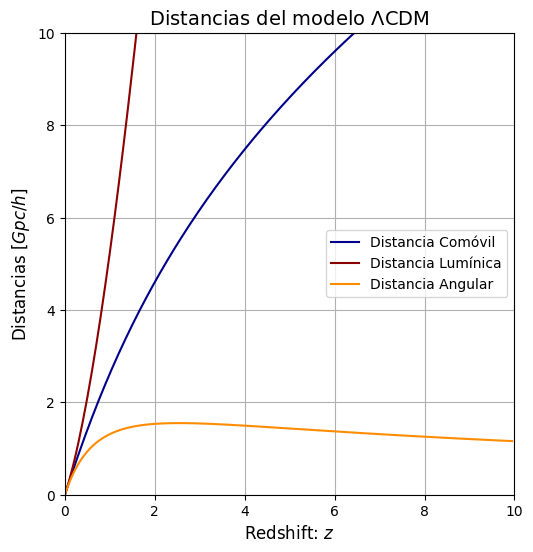

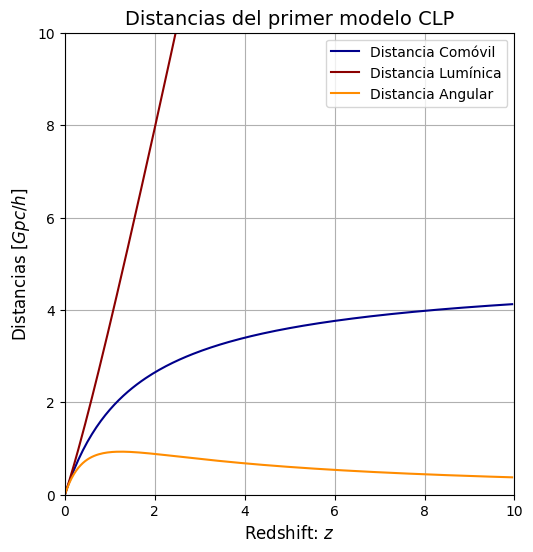

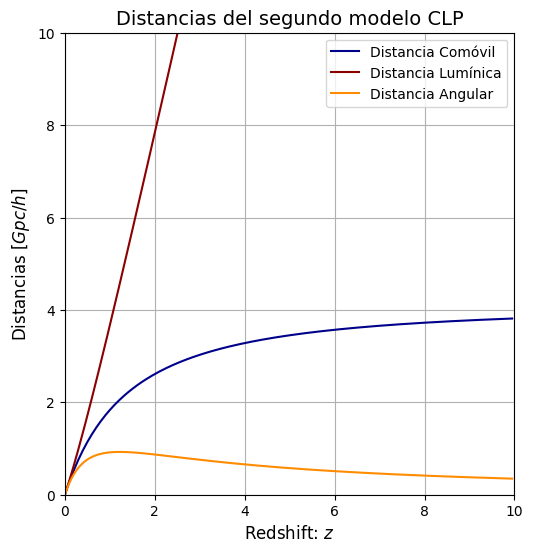

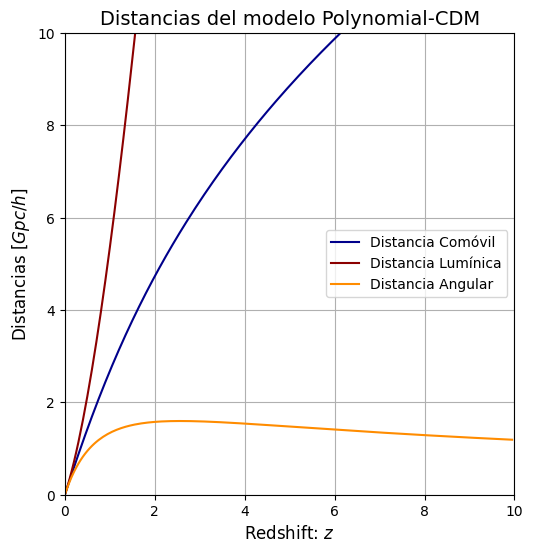

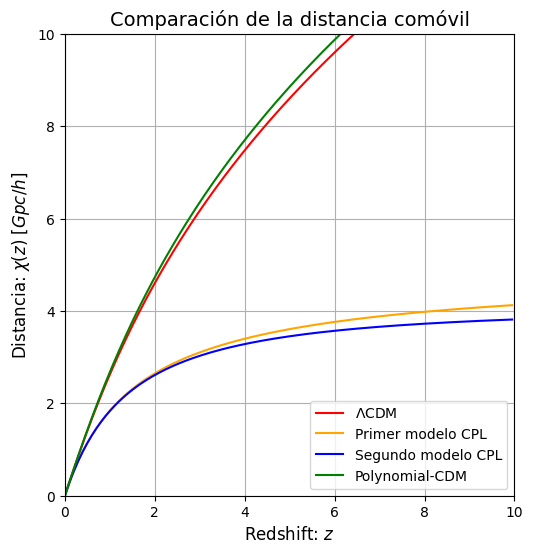

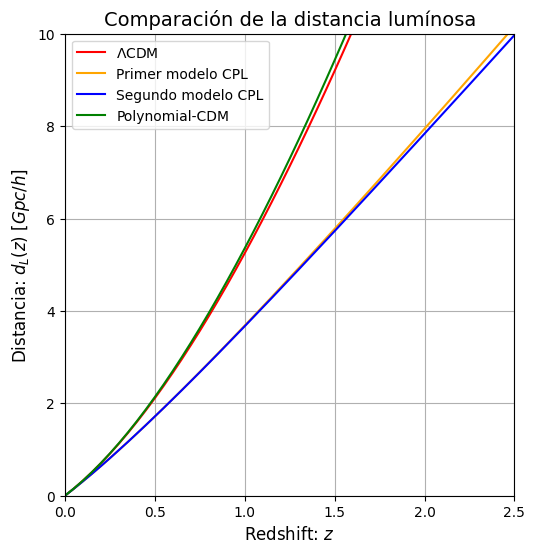

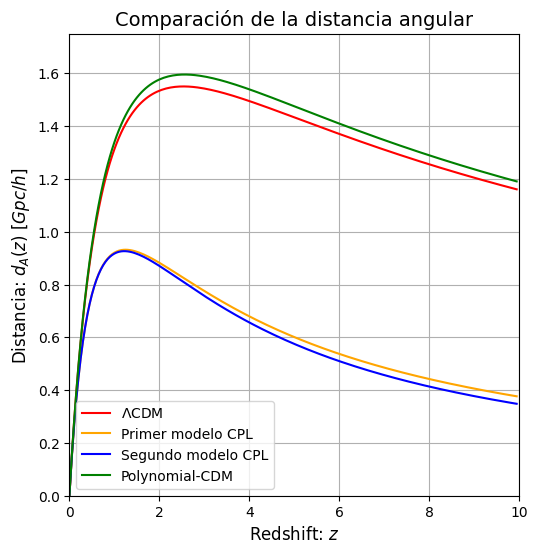

In [7]:
# Comparación de distancias
# LCDM model
plt.figure(figsize=(5.8,6))
plt.plot(z,X_LCDM(z), color='darkblue', label='Distancia Comóvil')
plt.plot(z,DL_LCDM(z), color='darkred', label='Distancia Lumínica')
plt.plot(z,DA_LCDM(z), color='darkorange', label='Distancia Angular')
plt.xlabel('Redshift: $z$', size=12)
plt.ylabel('Distancias [$Gpc/h$]', size=12)
plt.title("Distancias del modelo $\\Lambda$CDM", size=14)
plt.xlim(z_min,z_max)
plt.ylim(0,10)
plt.legend()
plt.grid(True)
# CLP firts model
plt.figure(figsize=(5.8,6))
plt.plot(z,X_CLP1(z), color='darkblue', label='Distancia Comóvil')
plt.plot(z,DL_CLP1(z), color='darkred', label='Distancia Lumínica')
plt.plot(z,DA_CLP1(z), color='darkorange', label='Distancia Angular')
plt.xlabel('Redshift: $z$', size=12)
plt.ylabel('Distancias [$Gpc/h$]', size=12)
plt.title("Distancias del primer modelo CLP", size=14)
plt.xlim(z_min,z_max)
plt.ylim(0,10)
plt.legend()
plt.grid(True)
# CLP second model
plt.figure(figsize=(5.8,6))
plt.plot(z,X_CLP2(z), color='darkblue', label='Distancia Comóvil')
plt.plot(z,DL_CLP2(z), color='darkred', label='Distancia Lumínica')
plt.plot(z,DA_CLP2(z), color='darkorange', label='Distancia Angular')
plt.xlabel('Redshift: $z$', size=12)
plt.ylabel('Distancias [$Gpc/h$]', size=12)
plt.title("Distancias del segundo modelo CLP", size=14)
plt.xlim(z_min,z_max)
plt.ylim(0,10)
plt.legend()
plt.grid(True)
# CPolynomial-CDM model
plt.figure(figsize=(5.8,6))
plt.plot(z,X_PCDM(z), color='darkblue', label='Distancia Comóvil')
plt.plot(z,DL_PCDM(z), color='darkred', label='Distancia Lumínica')
plt.plot(z,DA_PCDM(z), color='darkorange', label='Distancia Angular')
plt.xlabel('Redshift: $z$', size=12)
plt.ylabel('Distancias [$Gpc/h$]', size=12)
plt.title("Distancias del modelo Polynomial-CDM", size=14)
plt.xlim(z_min,z_max)
plt.ylim(0,10)
plt.legend()
plt.grid(True)
# Comparación de modelos
# Distancia comóvil
plt.figure(figsize=(5.8,6))
plt.plot(z,X_LCDM(z), color='red', label='$\\Lambda$CDM')
plt.plot(z,X_CLP1(z), color='orange', label='Primer modelo CPL')
plt.plot(z,X_CLP2(z), color='blue', label='Segundo modelo CPL')
plt.plot(z,X_PCDM(z), color='green', label='Polynomial-CDM')
plt.xlabel('Redshift: $z$', size=12)
plt.ylabel('Distancia: $\\chi (z)$ [$Gpc/h$]', size=12)
plt.title("Comparación de la distancia comóvil", size=14)
plt.legend()
plt.xlim(z_min,z_max)
plt.ylim(0,10)
plt.legend()
plt.grid(True)
# Distancia lumínosa
plt.figure(figsize=(5.8,6))
plt.plot(z,DL_LCDM(z), color='red', label='$\\Lambda$CDM')
plt.plot(z,DL_CLP1(z), color='orange', label='Primer modelo CPL')
plt.plot(z,DL_CLP2(z), color='blue', label='Segundo modelo CPL')
plt.plot(z,DL_PCDM(z), color='green', label='Polynomial-CDM')
plt.xlabel('Redshift: $z$', size=12)
plt.ylabel('Distancia: $d_L (z)$ [$Gpc/h$]', size=12)
plt.title("Comparación de la distancia lumínosa", size=14)
plt.legend()
plt.xlim(z_min,2.5)
plt.ylim(0,10)
plt.legend()
plt.grid(True)
# Distancia angular
plt.figure(figsize=(5.8,6))
plt.plot(z,DA_LCDM(z), color='red', label='$\\Lambda$CDM')
plt.plot(z,DA_CLP1(z), color='orange', label='Primer modelo CPL')
plt.plot(z,DA_CLP2(z), color='blue', label='Segundo modelo CPL')
plt.plot(z,DA_PCDM(z), color='green', label='Polynomial-CDM')
plt.xlabel('Redshift: $z$', size=12)
plt.ylabel('Distancia: $d_A (z)$ [$Gpc/h$]', size=12)
plt.title("Comparación de la distancia angular", size=14)
plt.legend()
plt.xlim(z_min,z_max)
plt.ylim(0,1.75)
plt.legend()
plt.grid(True)